Data downloaded from https://www.kaggle.com/extralime/math-lectures/version/2

In [2]:
import numpy as np
import pandas as pd
import nltk

Standardize

In [2]:
import random
import re
import string

In [3]:
# takes ~30 seconds to import
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

Vectorize

In [4]:
from sklearn.feature_extraction.text import CountVectorizer


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer()

Reduce Dimensions

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF


Cluster

In [7]:
from sklearn.cluster import KMeans

Visualize

In [8]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/envs/metis/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Read in the data

In [3]:
df = pd.read_csv("raw_text.csv")

In [4]:
df.head()

,text,label
0,The following content is\nprovided under a Cre...,Calculus
1,"In this sequence of segments,\nwe review some ...",Probability
2,The following content is\nprovided under a Cre...,CS
3,The following\ncontent is provided under a Cre...,Algorithms
4,The following\ncontent is provided under a Cre...,Algorithms


In [5]:
df.groupby('label').count()

,text
label,
AI,48
Algorithms,81
CS,104
Calculus,70
Data Structures,62
Diff. Eq.,93
Linear Algebra,152
Math for Eng.,28
NLP,19


In [11]:
df.iloc[0][0]

"The following content is\nprovided under a Creative Commons license. Your support will help\nMIT OpenCourseWare continue to offer high quality\neducational resources for free. To make a donation, or to\nview additional materials from hundreds of MIT courses,\nvisit MIT OpenCourseWare at ocw.mit.edu. PROFESSOR: So,\nProfessor Jerison is relaxing in sunny\nLondon, Ontario today and sent me in as\nhis substitute again. I'm glad to the here\nand see you all again. So our agenda today: he\nsaid that he'd already talked about power series\nand Taylor's formula, I guess on last week\nright, on Friday? So I'm going to go a\nlittle further with that and show you some examples,\nshow you some applications, and then I have this\ncourse evaluation survey that I'll hand out in the last\n10 minutes or so of the class. I also have this handout\nthat he made that says 18.01 end of term 2007. If you didn't pick this up\ncoming in, grab it going out. People tend not to pick it\nup when they walk in, I 

# Exploratory Data Analysis

In [12]:
len(df) # 860 documents in the dataset

860

In [13]:
# look at balance of labels
subjects = df.label.value_counts(normalize=True).round(2)

In [14]:
subjects = pd.Series(subjects.index)

In [15]:
subjects

0      Linear Algebra
1         Probability
2                  CS
3           Diff. Eq.
4          Algorithms
5          Statistics
6            Calculus
7     Data Structures
8                  AI
9       Math for Eng.
10                NLP
dtype: object

Most videos cover Linear Algebra. Fewest cover NLP.  

Some thoughts:
- Are Algorithms, Data Structures, AI, and NLP all sub-categories of CS?
- Would Probability and Statistics have a lot of overlap?
- I expect Calculus, Linear Algebra, and Diff. Eq. to be mostly unique.
- How do I account for one subject depending on another?

# Text Pre-Processing

## Pick a few documents at random from each subject and test some cleaning operations

In [16]:
import random # for some reason, random.choices doesn't work here unless you import random again.
test_df = df.copy()
test = []
for s in subjects:
    test.append(random.choices(test_df.iloc[:,0], k=5))

In [17]:
len(test)

11

In [18]:
test[0]

['The following content is\nprovided under a Creative Commons license. Your support will help\nMIT OpenCourseWare continue to offer high quality\neducational resources for free. To make a donation or\nview additional materials from hundreds of MIT courses,\nvisit MIT OpenCourseWare at ocw.mit.edu. ERIC GRIMSON: Ladies\nand gentlemen, I\'d like to get started. My name\'s Eric Grimson. I have the privilege of\nserving as MIT\'S chancellor for academic advancement, you\ncan go look up what that means, and like John I\'m a\nformer head of course six. This term, with\nAna and John, I\'m going to be splitting the\nlectures, so I\'m up to date. OK last time Ana introduced\nthe first of the compound data types, tuples and lists. She showed lots of ways\nof manipulating them, lots of built in things for\nmanipulating those structures. And the key difference\nbetween the two of them was that tuples were immutable,\nmeaning you could not change them, lists\nwere mutable, they could be changed, or

### remove newline terms i.e. "\n"

In [19]:
test_n_0 = re.sub('[%s]' % re.escape("\n"), ' ', test[0][0])
test_n_0

'The following content is provided under a Creative Commons license. Your support will help MIT OpenCourseWare continue to offer high quality educational resources for free. To make a donation or view additional materials from hundreds of MIT courses, visit MIT OpenCourseWare at ocw.mit.edu. ERIC GRIMSON: Ladies and gentlemen, I\'d like to get started. My name\'s Eric Grimson. I have the privilege of serving as MIT\'S chancellor for academic advancement, you can go look up what that means, and like John I\'m a former head of course six. This term, with Ana and John, I\'m going to be splitting the lectures, so I\'m up to date. OK last time Ana introduced the first of the compound data types, tuples and lists. She showed lots of ways of manipulating them, lots of built in things for manipulating those structures. And the key difference between the two of them was that tuples were immutable, meaning you could not change them, lists were mutable, they could be changed, or mutated. And that

In [20]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

### investigate and remove stop words

In [21]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# PIPELINE

FUNCTION 1: Standardize  
FUNCTION 2: Vectorize  
FUNCTION 3: Reduce Dimensions  
FUNCTION 4: Cluster/Visualize

## Function 1: Standardize

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def standardize(df):
    # indicates things to be removed
    remove = ',.(--)?'
    # replace '\n' with whitespace
    repl = lambda x: re.sub('\n', ' ', x)
    # remove indicated items with regex
    rem = lambda x: re.sub('[%s]' % re.escape(remove), '', x.lower())
    
    # apply "repl" and "rem" functions to documents
    df['text'] = df.text.map(repl).map(rem)
    # also replace "taylor's" with "taylor"
    df['text']= df['text'].str.replace("taylor's", "taylor", case = False) 
    return df

In [24]:
df_mvp_s = standardize(df)

In [25]:
df_mvp_s.iloc[0][0]

"the following content is provided under a creative commons license your support will help mit opencourseware continue to offer high quality educational resources for free to make a donation or to view additional materials from hundreds of mit courses visit mit opencourseware at ocwmitedu professor: so professor jerison is relaxing in sunny london ontario today and sent me in as his substitute again i'm glad to the here and see you all again so our agenda today: he said that he'd already talked about power series and taylor formula i guess on last week right on friday so i'm going to go a little further with that and show you some examples show you some applications and then i have this course evaluation survey that i'll hand out in the last 10 minutes or so of the class i also have this handout that he made that says 1801 end of term 2007 if you didn't pick this up coming in grab it going out people tend not to pick it up when they walk in i see so grab this when you're going out ther

## Function 2: Vectorize

In [26]:
def vectorize_count(df):
    '''
    Creates a sparse matrix of counts with Count Vectorizer
    '''
    # define series to go into vectorizer
    x = df['text']
    # define vectorizer
    cv1 = CountVectorizer()
    # vectorize; convert to sparse matrix "sm"
    sm = cv1.fit_transform(x)
    # print the matrix
    print(pd.DataFrame(sm.toarray(), columns=cv1.get_feature_names()))
    # return the sparse matrix
    return sm

In [27]:
sm_mvp_v_c = vectorize_count(df_mvp_s)

     00  000  0000  00000000  000000001  0000001  000001  00001  00001001  \
0     0    0     0         0          0        0       0      0         0   
1     0    0     0         0          0        0       0      0         0   
2     0    0     0         0          0        0       0      0         0   
3     0    0     0         0          0        0       0      0         0   
4     0    0     0         0          0        0       0      0         0   
..   ..  ...   ...       ...        ...      ...     ...    ...       ...   
855   0    0     0         0          0        0       0      0         0   
856   1    0     0         0          0        0       0      0         0   
857   0    0     0         0          0        0       0      0         0   
858   0    0     0         0          0        0       0      0         0   
859   0    0     0         0          0        0       0      0         0   

     0001  ...  zt  zuiden  zx  zxy  zy  zyaxis  zz  zz1  zzz  zzzzzz  
0  

In [28]:
sm_mvp_v_c.shape

(860, 27175)

## Function 3: Reduce Dimensions

In [29]:
def reduce_dim(sm):
    # define Truncated SVD
    lsa = TruncatedSVD(5)
    # do LSA on sparse matrix "sm"
    rd = lsa.fit_transform(sm)
    # print explained variance ratio
    print("LSA Explained Variance Ratio: ",lsa.explained_variance_ratio_)
    # return matrix of reduced dimensions
    return rd

In [30]:
rd_mvp_v = reduce_dim(sm_mvp_v_c)

LSA Explained Variance Ratio:  [0.68294091 0.03126201 0.0259533  0.02054043 0.01713769]


In [31]:
rd_mvp_v

array([[ 5.04195928e+02, -5.95668693e+01, -7.88173298e+00,
         2.33061230e+01,  3.55245369e+01],
       [ 1.77218204e+01,  3.94034711e-01, -8.23993924e-01,
         2.95877453e+00,  3.62982865e-01],
       [ 6.39328180e+02,  8.83198069e+01,  4.10248349e+01,
        -5.85406310e+01, -4.28884284e+01],
       ...,
       [ 5.30604217e+02, -3.77497686e+01, -7.73703962e+01,
        -1.83192393e+01, -2.19415246e+01],
       [ 5.10920812e+02,  3.80267249e+01,  3.86597455e+00,
         2.28367350e+00,  9.57524200e+00],
       [ 6.33125456e+02,  4.62061753e+00, -2.02611315e+00,
        -7.39795939e+01,  1.04477597e+01]])

### Look at the topics

In [40]:
def display_topics(model, feature_names, num_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [44]:
x = df['text']
cv1 = CountVectorizer()
sm = cv1.fit_transform(x)
lsa = TruncatedSVD(5)
rd = lsa.fit_transform(sm)
display_topics(lsa, cv1.get_feature_names(), 5)


Topic  0
the, to, that, and, of

Topic  1
we, so, to, gt, re

Topic  2
you, and, it, gt, in

Topic  3
of, we, and, gt, that

Topic  4
gt, of, that, is, this


In [48]:
x = df['text']
cv2 = TfidfVectorizer()
sm = cv2.fit_transform(x)
lsa = TruncatedSVD(20)
rd = lsa.fit_transform(sm)
display_topics(lsa, cv2.get_feature_names(), 5)


Topic  0
the, to, that, of, is

Topic  1
matrix, vector, row, minus, times

Topic  2
probability, the, of, event, conditional

Topic  3
node, we, this, address, list

Topic  4
gt, matrix, the, row, transpose

Topic  5
gt, laplace, of, transform, just

Topic  6
vector, probability, we, you, of

Topic  7
vector, vectors, plane, will, it

Topic  8
laplace, transform, of, you, vector

Topic  9
so, we, that, laplace, okay

Topic  10
audience, professor, laplace, so, vector

Topic  11
we, to, and, laplace, it

Topic  12
equation, audience, solution, professor, differential

Topic  13
of, transpose, to, space, matrix

Topic  14
probability, node, it, okay, solution

Topic  15
and, so, null, space, you

Topic  16
is, graph, edges, edge, row

Topic  17
lambda, audience, state, professor, graph

Topic  18
psi, partial, transpose, respect, node

Topic  19
tree, subtree, and, mit, psi


## Function 4: Cluster/Visualize

In [32]:
# From KMeansClustering.ipynb: 
# helper function that allows us to display data in 2 dimensions and highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
            plt.savefig("mvp.jpg")

In [33]:
def cluster(rd):
    num_clusters = 5
    km = KMeans(n_clusters=num_clusters,random_state=10,n_init=10) # n_init, number of times the K-mean algorithm will run
    km.fit(rd)
    display_cluster(rd,km,num_clusters)

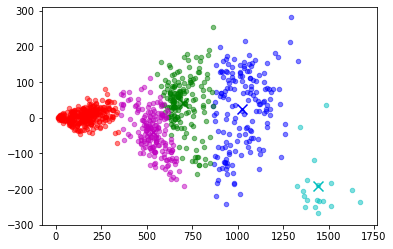

In [34]:
cluster(rd_mvp_v)

Well, it's something.

# Helpful Code Pieces

In [ ]:
# How to display topics
# def display_topics(model, feature_names, num_top_words, topic_names=None):
#     for ix, topic in enumerate(model.components_):
#         if not topic_names or not topic_names[ix]:
#             print("\nTopic ", ix)
#         else:
#             print("\nTopic: '",topic_names[ix],"'")
#         print(", ".join([feature_names[i]
#                         for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [35]:
# How to CountVectorizer and TfIDF
# corpus = ['This is the first document.',
#           'This is the second document.',
#           'And the third one. One is fun.’]

# # original Count Vectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# X = cv.fit_transform(corpus).toarray()
# pd.DataFrame(X, columns=cv.get_feature_names())

# # new TF-IDF Vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# cv_tfidf = TfidfVectorizer()
# X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
# pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

In [36]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
# import re
# import string

# alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# data['reviews'] = data.reviews.map(alphanumeric).map(punc_lower)

In [37]:
# How to make sure all components match a certain format: 'XX-###'
# coc_regex = re.compile(r"^[A-Z]{2}-\d{3}.") # any two letters plus - plus any three digits plus any character
#                                             # to find any entries without this format
# df_pit_clean["CoC Number"].apply(lambda x: bool(coc_regex.search(x))).value_counts()

# trying to display the row that doesn't satisfy the regex test
# df_pit_clean[df_pit_clean["CoC Number"].apply(lambda x: bool(coc_regex.search(x)))]

In [38]:
# How to split on a given regex delimiter - from pair-eternal_golden_braid.ipynb (Scott)
# split_re = re.compile(r'\W')
# mmg_words = split_re.split(mmg.lower())

In [39]:
# How to take some choices at random - from pair_lda.ipynb (kristen and danish)
# import random 
# def make_doc(topic_probs, n_words):
#     for prob in topic_probs:
#         doc = random.choices(prob, k = n_words)
#         print(' '.join(doc))
# make_doc([prob_words0, prob_words1, prob_words2], 10)